### **Trabajo 2 - Generación de Texto con Modelos Recurrentes (RNN)**

#### Desarrollado por Sergio Mahía INSO 3A

Este notebook tiene como objetivo desarrollar un modelo basado en redes neuronales recurrentes (RNN), específicamente utilizando capas LSTM, para la generación de texto en español. El dataset consiste en intervenciones parlamentarias, y el modelo aprenderá a generar contenido que refleje el estilo y las estructuras lingüísticas presentes en estos datos.

#### **Estructura del Notebook**
1. **Carga y Preprocesamiento de Datos**:
   - Preparación del dataset para su uso en el modelo.
   - Conversión del texto en representaciones numéricas.

2. **Definición del Modelo**:
   - Arquitectura basada en capas LSTM para capturar dependencias temporales en el texto.
   - Regularización y técnicas de optimización para mejorar el rendimiento.

3. **Entrenamiento del Modelo**:
   - Uso de técnicas de optimización avanzadas para ajustar los parámetros.
   - Evaluación del desempeño durante el entrenamiento.

4. **Generación de Texto**:
   - Uso del modelo entrenado para generar texto a partir de una cadena inicial.
   - Análisis de la coherencia y diversidad del contenido generado.

#### **Objetivo Principal**
Crear un modelo capaz de generar texto que sea coherente y relevante, reflejando tanto el estilo como el contenido del dataset, y optimizando su calidad mediante ajustes progresivos en el diseño y entrenamiento.

#### **Importancia del Trabajo**
La generación de texto automatizada tiene múltiples aplicaciones, desde la creación de contenido hasta el análisis del lenguaje natural en contextos políticos y sociales. Este proyecto proporciona una base sólida para explorar dichas aplicaciones, mostrando el poder de las RNN y técnicas modernas de aprendizaje automático.

### **Importación de Librerías Necesarias**

En esta celda, se importan las librerías y módulos esenciales para la construcción y entrenamiento del modelo:

1. **`tensorflow` y `keras`**:
   - `tensorflow`: Biblioteca principal utilizada para construir y entrenar redes neuronales.
   - `keras`: API de alto nivel integrada en TensorFlow para la creación de modelos de aprendizaje profundo.

2. **`numpy`**:
   - Biblioteca para realizar operaciones matemáticas y de manipulación de datos de manera eficiente.

3. **`os` y `time`**:
   - `os`: Proporciona funcionalidades para interactuar con el sistema operativo, como manejar archivos y directorios.
   - `time`: Permite medir el tiempo de ejecución de las operaciones, útil para evaluar el rendimiento.

Estas herramientas constituyen la base necesaria para trabajar con el modelo de generación de texto basado en redes neuronales recurrentes.


In [1]:
# Importar TensorFlow, la biblioteca principal para construir redes neuronales
import tensorflow as tf

# Importar Keras, una API de alto nivel para construir y entrenar modelos
from tensorflow import keras

# Importar NumPy para operaciones matemáticas eficientes
import numpy as np

# Importar el módulo 'os' para interactuar con el sistema operativo (archivos, directorios, etc.)
import os

# Importar 'time' para medir tiempos de ejecución
import time

# Comprobar las versiones de TensorFlow y NumPy
print("Versión de TensorFlow:", tf.__version__)
print("Versión de NumPy:", np.__version__)

Versión de TensorFlow: 2.17.1
Versión de NumPy: 1.26.4


### **Ruta del Archivo**

Se define la ruta del archivo que contiene las intervenciones parlamentarias. Esta variable será utilizada para acceder al archivo en el sistema. Si se trabaja en un entorno diferente (por ejemplo, local o en Google Colab), la ruta debe ajustarse según corresponda.

- **Nota**: Es importante asegurarse de que el archivo exista en la ubicación especificada para evitar errores al intentar leerlo.


In [2]:
filepath = "/content/intervencionesAbascal.txt"  # Cambiar a la ruta correcta

### **Carga y Análisis Inicial del Texto**

En esta celda se realiza la carga y análisis inicial del archivo de texto que contiene las intervenciones parlamentarias. Las principales tareas realizadas son:

1. **Lectura del Archivo**:
   - Se carga el archivo de texto desde la ruta y se decodifica utilizando `utf-8` para garantizar la correcta interpretación de los caracteres especiales.

2. **Análisis Básico**:
   - Se calcula la longitud total del texto cargado en caracteres.
   - Se extraen los caracteres únicos que componen el texto, generando un vocabulario ordenado.

3. **Salida de Información**:
   - Se muestra la longitud total del texto en caracteres y el número de caracteres únicos para comprender la diversidad del conjunto de datos.
   - Se imprime el vocabulario completo.

Estas operaciones permiten comprender las características básicas del dataset y preparar el texto para su posterior preprocesamiento.




In [3]:
# Verificar si el archivo existe antes de intentar leerlo
if os.path.exists(filepath):
    # Leer el archivo en modo binario y decodificarlo a texto utilizando 'utf-8'
    text = open(filepath, 'rb').read().decode(encoding='utf-8')

    # Mostrar la longitud del texto cargado (número de caracteres totales)
    print(f'Longitud del texto: {len(text)} caracteres')

    # Crear un vocabulario con los caracteres únicos presentes en el texto, ordenados alfabéticamente
    vocab = sorted(set(text))

    # Mostrar el número de caracteres únicos en el texto
    print(f'El texto está compuesto de {len(vocab)} caracteres únicos.')

    # Mostrar una parte del vocabulario para evitar saturar la salida
    print(f'Primeros 20 caracteres únicos: {vocab[:20]}')
else:
    print(f"El archivo en la ruta {filepath} no existe. Verifica la ruta proporcionada.")


Longitud del texto: 22573 caracteres
El texto está compuesto de 81 caracteres únicos.
Primeros 20 caracteres únicos: ['\n', ' ', '!', '%', ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A']


### **Distribución de Frecuencia de Caracteres**

Este gráfico muestra la frecuencia de aparición de cada carácter único en el texto. Es útil para:

- Analizar la distribución del vocabulario y detectar posibles sesgos en los datos.
- Evaluar si ciertos caracteres dominan el dataset, lo que podría influir en el comportamiento del modelo.

El eje X representa los caracteres únicos en el vocabulario, y el eje Y, su frecuencia en el texto.

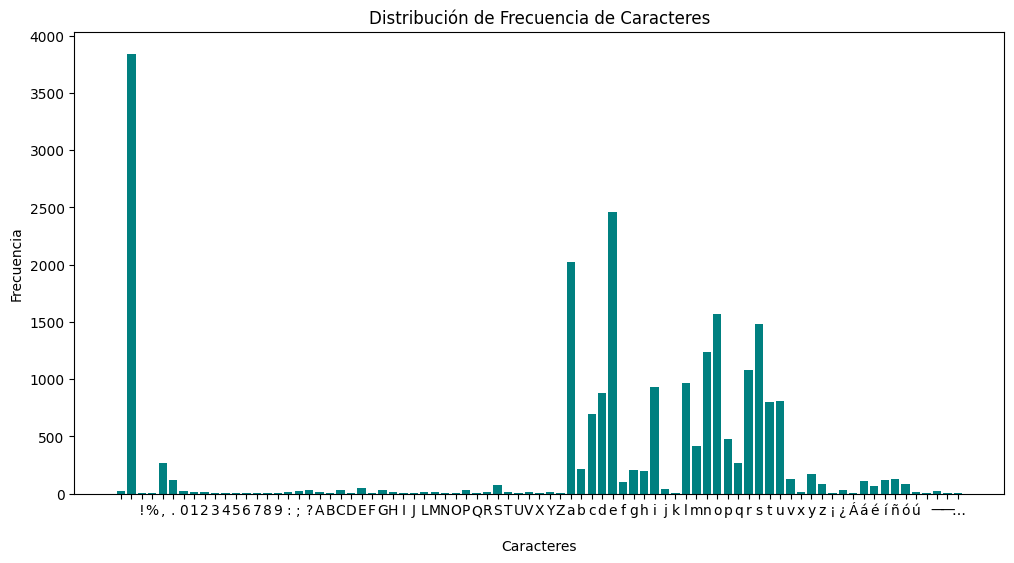

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_character_distribution(text, vocab):
    char_counts = Counter(text)
    sorted_counts = {char: char_counts[char] for char in vocab}

    plt.figure(figsize=(12, 6))
    plt.bar(sorted_counts.keys(), sorted_counts.values(), color='teal')
    plt.title('Distribución de Frecuencia de Caracteres')
    plt.xlabel('Caracteres')
    plt.ylabel('Frecuencia')
    plt.show()

# Llamar a la función
plot_character_distribution(text, vocab)


### **Top n-gramas Más Comunes**

Este gráfico muestra los n-gramas más frecuentes en el dataset. Un n-grama es una secuencia de n palabras consecutivas en el texto, y su análisis es útil para:

- **Identificar patrones recurrentes** en el texto.
- **Entender la estructura lingüística** predominante en el dataset.

El eje X representa la frecuencia, mientras que el eje Y muestra los n-gramas más comunes. Este análisis es particularmente relevante para evaluar la consistencia del texto generado en comparación con el texto de referencia.


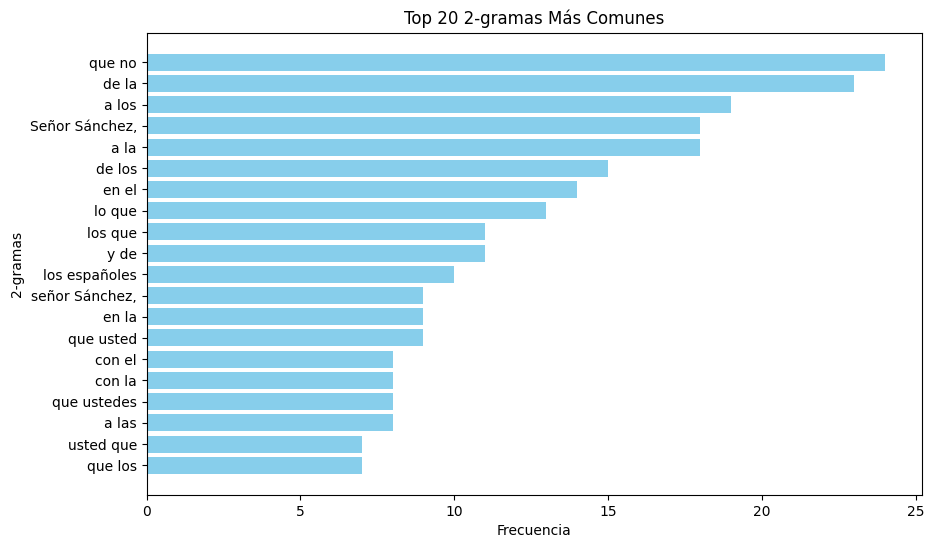

In [5]:
from collections import Counter

def plot_most_common_ngrams(text, n=2, top_k=20):
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    ngram_counts = Counter(ngrams)
    most_common = ngram_counts.most_common(top_k)

    labels, values = zip(*most_common)
    labels = [' '.join(label) for label in labels]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.title(f'Top {top_k} {n}-gramas Más Comunes')
    plt.xlabel('Frecuencia')
    plt.ylabel(f'{n}-gramas')
    plt.gca().invert_yaxis()
    plt.show()

# Llamar a la función para visualizar los bigramas más comunes
plot_most_common_ngrams(text, n=2, top_k=20)


### **Conversión de Caracteres a Representación Numérica**

Dado que las redes neuronales procesan valores numéricos y no caracteres, es necesario convertir el texto a una representación numérica. Esta celda realiza las siguientes tareas:

1. **Creación de Diccionarios de Mapeo**:
   - `char2idx`: Diccionario que asigna un índice numérico a cada carácter único en el vocabulario.
   - `idx2char`: Array que permite mapear un índice numérico de vuelta a su carácter correspondiente.

2. **Visualización del Mapeo**:
   - Se imprimen los pares de carácter e índice para una parte del vocabulario, ayudando a verificar la asignación realizada.

Este paso es fundamental para preprocesar el texto y prepararlo para el entrenamiento del modelo.


In [6]:
# Verificar si el vocabulario no está vacío antes de proceder
if vocab:
    # Crear un diccionario que mapea cada carácter único a un índice numérico
    char2idx = {u: i for i, u in enumerate(vocab)}

    # Crear un array que mapea índices numéricos a sus caracteres correspondientes
    idx2char = np.array(vocab)

    # Imprimir los primeros 40 pares carácter-índice para verificar el mapeo
    print("Primeros 40 pares carácter-índice:")
    for char, _ in zip(char2idx, range(40)):
        print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
else:
    print("Error: El vocabulario está vacío. Asegúrate de que el texto fue cargado correctamente.")


Primeros 40 pares carácter-índice:
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '%' :   3,
  ',' :   4,
  '.' :   5,
  '0' :   6,
  '1' :   7,
  '2' :   8,
  '3' :   9,
  '4' :  10,
  '5' :  11,
  '6' :  12,
  '7' :  13,
  '8' :  14,
  '9' :  15,
  ':' :  16,
  ';' :  17,
  '?' :  18,
  'A' :  19,
  'B' :  20,
  'C' :  21,
  'D' :  22,
  'E' :  23,
  'F' :  24,
  'G' :  25,
  'H' :  26,
  'I' :  27,
  'J' :  28,
  'L' :  29,
  'M' :  30,
  'N' :  31,
  'O' :  32,
  'P' :  33,
  'Q' :  34,
  'R' :  35,
  'S' :  36,
  'T' :  37,
  'U' :  38,
  'V' :  39,


### **Conversión del Texto a una Representación Numérica**

En esta celda, el texto completo se transforma en un array de enteros, donde cada carácter es representado por su índice correspondiente en el diccionario `char2idx`. Esto es necesario porque las redes neuronales solo pueden trabajar con datos numéricos.

- **`text_as_int`**: Array de enteros que representa el texto original en términos numéricos, listo para ser procesado por el modelo.

Este paso es fundamental para preprocesar los datos y preparar el texto para su entrada en la red neuronal.


In [7]:
# Convertir el texto completo a un array de enteros
# Cada carácter del texto se reemplaza por su índice correspondiente en char2idx
text_as_int = np.array([char2idx[c] for c in text])

### **Visualización del Texto y su Representación Numérica**

En esta celda, se realiza una verificación visual del texto y su transformación a representación numérica:

1. **Texto Original**:
   - Se muestran los primeros 50 caracteres del texto original para confirmar que fue cargado correctamente.

2. **Texto Convertido**:
   - Se presentan los índices numéricos correspondientes a los primeros 50 caracteres del texto, basados en el diccionario `char2idx`.

Este paso permite verificar que la conversión del texto a su representación numérica se realizó de manera adecuada.


In [8]:
# Mostrar los primeros 50 caracteres del texto original
print('texto : {}'.format(repr(text[:50])))

# Mostrar los índices numéricos correspondientes a los primeros 50 caracteres del texto
print('{}'.format(repr(text_as_int[:50])))


texto : 'Señor Sánchez, ¿cómo se atreve usted a hablarme de'
array([36, 47, 74, 57, 60,  1, 36, 71, 56, 45, 50, 47, 67,  4,  1, 69, 45,
       75, 55, 57,  1, 61, 47,  1, 43, 62, 60, 47, 64, 47,  1, 63, 61, 62,
       47, 46,  1, 43,  1, 50, 43, 44, 54, 43, 60, 55, 47,  1, 46, 47])


### **Creación del Dataset para Entrenamiento**

En esta celda se prepara el conjunto de datos necesario para entrenar el modelo:

1. **Conversión a Dataset de TensorFlow**:
   - Se utiliza la función `tf.data.Dataset.from_tensor_slices` para convertir el array de índices (`text_as_int`) en un dataset de TensorFlow. Esto permite manejar el texto en fragmentos más pequeños que pueden ser procesados por el modelo.

2. **División en Secuencias**:
   - Se define una longitud de secuencia (`seq_length`) de 100 caracteres.
   - El dataset se agrupa en secuencias de longitud `seq_length + 1` utilizando el método `batch`.
   - El parámetro `drop_remainder=True` asegura que solo se mantengan los lotes completos.

Este paso es crucial para estructurar los datos en fragmentos que el modelo pueda procesar durante el entrenamiento.


In [9]:
# Convertir el array de índices en un dataset de TensorFlow
# Cada elemento del dataset será un carácter representado por su índice numérico
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

# Definir la longitud de las secuencias para el modelo
seq_length = 100

# Agrupar el dataset en secuencias de longitud seq_length + 1
# Esto incluye el carácter actual y el siguiente como objetivo
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

### **Verificación de las Secuencias Generadas**

En esta celda se realiza una verificación de las secuencias creadas a partir del dataset.

1. **Propósito**:
   - Confirmar que las secuencias generadas contienen 101 caracteres (100 para la entrada y 1 para el objetivo).
   - Asegurarse de que la conversión numérica inversa (`idx2char`) restaura correctamente el texto original.

2. **Visualización**:
   - Se muestran las primeras 10 secuencias generadas como texto para verificar su contenido.

Este paso es importante para garantizar que las secuencias han sido correctamente formateadas antes de ser usadas en el entrenamiento.


In [10]:
# Verificar que las secuencias generadas tienen 101 caracteres (100 de entrada + 1 de salida)
# Tomar y mostrar las primeras 10 secuencias del dataset
for item in sequences.take(10):  # Toma las primeras 10 secuencias
    # Convertir índices numéricos de nuevo a caracteres y unirlos como texto
    print(repr(''.join(idx2char[item.numpy()])))


'Señor Sánchez, ¿cómo se atreve usted a hablarme de monólogos si siempre trae las respuestas escritas,'
' si usted nunca contesta a mis preguntas? Conteste por lo menos hoy. ¿Qué va a hacer usted para imped'
'ir que VOX siga cruzando las líneas que dice usted que cruzamos? Conteste también lo que no me ha con'
'testado durante toda esta legislatura: ¿por qué mintió a los españoles prometiéndoles que no pactaría'
' con estos, con esos y con aquellos?  Contésteme a eso y entonces no habrá monólogos, habrá diálogo p'
'olítico, algo que nunca ha habido en esta Cámara por su culpa.\nNada, señor Sánchez, le prestamos los '
'siete segundos que nos quedan para su próxima cumbre bilateral, que seguro que los aprovecha bien. Mu'
'chas gracias.\nSeñor Sánchez, no puede haber barrios ni calles seguras si no hay fronteras seguras. ¿U'
'sted sabe lo que ha pasado en España las últimas semanas? ¿Sabe usted que algunos de los yihadistas d'
'etenidos en Barcelona, que pretendían atentar en nuestro país

### **Preparación de los Datos de Entrenamiento**

En esta celda, se realiza el paso clave de separar las secuencias en datos de entrada y salida:

1. **Función `split_input_target`**:
   - Toma una secuencia (`chunk`) y la divide en:
     - `input_text`: Todos los caracteres excepto el último (entrada para el modelo).
     - `target_text`: Todos los caracteres excepto el primero (objetivo o etiqueta).

2. **Aplicación de la Función**:
   - Se utiliza el método `map` del dataset para aplicar esta transformación a todas las secuencias, generando un dataset que contiene pares (entrada, salida).

Este paso es fundamental para estructurar los datos de forma que el modelo pueda aprender la relación entre las secuencias de entrada y sus objetivos.


In [11]:
# Definir una función que divide una secuencia en entrada y salida
def split_input_target(chunk):
    # Entrada: todos los caracteres excepto el último
    input_text = chunk[:-1]
    # Objetivo: todos los caracteres excepto el primero
    target_text = chunk[1:]
    return input_text, target_text

# Aplicar la función a todas las secuencias en el dataset
# Esto genera pares (entrada, salida) para cada secuencia
dataset = sequences.map(split_input_target)


### **Verificación de los Pares (Entrada y Salida)**

En esta celda se realiza una verificación del dataset transformado, mostrando cómo se estructuran las parejas de entrada y salida:

1. **Primera Pareja**:
   - Se toma el primer par del dataset y se convierte de nuevo a texto utilizando el diccionario `idx2char`.
   - `Input data`: Los 100 primeros caracteres de entrada.
   - `Target data`: Los caracteres objetivo correspondientes (los 100 caracteres desplazados en una posición hacia adelante).

2. **Dataset**:
   - Se imprime la estructura del dataset para confirmar que contiene las parejas adecuadas.

Este paso asegura que la preparación de los datos es correcta antes de entrenar el modelo.


In [12]:
# Mostrar la primera pareja (entrada y salida) del dataset transformado
for input_example, target_example in dataset.take(1):  # Tomar un solo par
    # Convertir la entrada de índices a texto y mostrarla
    print('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    # Convertir la salida de índices a texto y mostrarla
    print('Target data:', repr(''.join(idx2char[target_example.numpy()])))

# Imprimir la estructura general del dataset
print(dataset)


Input data:  'Señor Sánchez, ¿cómo se atreve usted a hablarme de monólogos si siempre trae las respuestas escritas'
Target data: 'eñor Sánchez, ¿cómo se atreve usted a hablarme de monólogos si siempre trae las respuestas escritas,'
<_MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int64, name=None), TensorSpec(shape=(100,), dtype=tf.int64, name=None))>


### **Creación de Batches para el Entrenamiento**

En esta celda se estructuran los datos para el entrenamiento del modelo:

1. **Definición de Parámetros**:
   - `BATCH_SIZE`: Número de muestras (pares entrada-salida) que se procesarán en cada iteración del entrenamiento. En este caso, se definen lotes de 64 parejas.
   - `BUFFER_SIZE`: Tamaño del buffer utilizado para mezclar aleatoriamente los datos. Esto ayuda a romper patrones en los datos secuenciales.

2. **Creación de Batches**:
   - Los datos se barajan utilizando `shuffle` con el tamaño del buffer definido.
   - Se agrupan en batches de tamaño `BATCH_SIZE` utilizando el método `batch`.

3. **Visualización**:
   - Se imprime la estructura del dataset resultante para confirmar que los datos están correctamente agrupados en lotes.

Este paso es esencial para organizar los datos de forma eficiente para el entrenamiento del modelo.


In [13]:
# Definir el tamaño de los lotes (batches) y el buffer para mezclar los datos
BATCH_SIZE = 64  # Tamaño del batch: número de pares entrada-salida por lote
BUFFER_SIZE = 10000  # Tamaño del buffer para mezclar aleatoriamente los datos

# Barajar el dataset y agruparlo en batches
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Imprimir la estructura del dataset para verificar los lotes
print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>


### **Definición del Modelo RNN**

Esta celda define una función que crea un modelo de red neuronal recurrente (RNN) compuesto por tres capas principales. Este modelo está diseñado para aprender las relaciones secuenciales en los datos textuales.

#### **Estructura del Modelo**
1. **Capa de Embedding**:
   - Convierte los índices numéricos de los caracteres en vectores densos de una dimensión específica (`embedding_dim`), proporcionando una representación continua y útil para el modelo.

2. **Capas LSTM**:
   - Primera Capa: Contiene `rnn_units` neuronas y está configurada para devolver secuencias completas (`return_sequences=True`).
   - Segunda Capa: Tiene la mitad de las unidades de la primera capa (`rnn_units // 2`) y también devuelve secuencias completas.
   - Ambas capas utilizan el inicializador `glorot_uniform` y una regularización mediante `Dropout` para reducir el sobreajuste.

3. **Capa Dense Intermedia**:
   - Contiene 512 neuronas con activación ReLU para introducir no linealidad y mejorar la capacidad de aprendizaje.

4. **Capa de Salida**:
   - Mapea las activaciones al tamaño del vocabulario (`vocab_size`), representando la probabilidad de cada carácter en la siguiente posición.

Este modelo combina técnicas de embedding, recurrencia y regularización para procesar texto y aprender patrones secuenciales de manera efectiva.


In [14]:
# Importar las herramientas necesarias de Keras
from tensorflow.keras import Sequential  # Para construir modelos secuenciales
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Capas necesarias

# Definir una función para construir el modelo
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = Sequential()  # Crear un modelo secuencial

    # Capa de tipo embedding: convierte índices numéricos en vectores densos
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

    # Primera capa LSTM: captura dependencias temporales largas
    model.add(LSTM(
        rnn_units,
        return_sequences=True,  # Devuelve secuencias completas
        stateful=True,  # Mantiene los estados entre lotes
        recurrent_initializer='glorot_uniform'  # Inicializador de pesos
    ))
    model.add(Dropout(0.4))  # Regularización para evitar sobreajuste

    # Segunda capa LSTM: refina los patrones aprendidos por la primera capa
    model.add(LSTM(
        rnn_units // 2,  # Mitad de unidades de la primera capa
        return_sequences=True,
        stateful=True,
        recurrent_initializer='glorot_uniform'
    ))
    model.add(Dropout(0.4))  # Regularización

    # Capa Dense intermedia: agrega no linealidad y capacidad de representación
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))  # Regularización

    # Capa de salida: devuelve una probabilidad para cada carácter en el vocabulario
    model.add(Dense(vocab_size))

    return model  # Devuelve el modelo construido

### **Construcción del Modelo RNN**

En esta celda se establecen los parámetros principales del modelo y se utiliza la función `build_model` para construir la arquitectura definida anteriormente.

#### **Parámetros del Modelo**
1. **`embedding_dim`**:
   - Dimensión de los vectores densos generados por la capa de embedding. En este caso, se define en 256.

2. **`rnn_units`**:
   - Número de unidades en la primera capa LSTM. Se establece en 1024, proporcionando una alta capacidad de aprendizaje.

3. **`BATCH_SIZE`**:
   - Tamaño de los lotes utilizados durante el entrenamiento, definido en 64.

#### **Construcción del Modelo**
- El modelo se construye llamando a `build_model` con los parámetros definidos, utilizando el tamaño del vocabulario como `vocab_size`.
- Esta celda configura y devuelve el modelo listo para ser compilado y entrenado.


In [15]:
# Establecer los parámetros principales del modelo
embedding_dim = 256  # Dimensión de los vectores de embedding
rnn_units = 1024  # Número de unidades en la primera capa LSTM
BATCH_SIZE = 64  # Tamaño de los lotes para el entrenamiento

# Construir el modelo utilizando la función build_model
model = build_model(
    vocab_size=len(vocab),  # Tamaño del vocabulario
    embedding_dim=embedding_dim,  # Dimensión del embedding
    rnn_units=rnn_units,  # Número de unidades en la capa LSTM
    batch_size=BATCH_SIZE  # Tamaño de los lotes
)

### **Inspección de Dimensiones de los Tensores**

En esta celda se verifica la estructura de los tensores de entrada y salida en el dataset, asegurando que sus dimensiones sean correctas antes de proceder al entrenamiento del modelo.

#### **Descripción de las Operaciones**
1. **Extracción de un Batch**:
   - Se toma el primer lote de datos (`dataset.take(1)`) que contiene las entradas y objetivos correspondientes.

2. **Impresión de las Dimensiones**:
   - Se muestran las dimensiones del tensor de entrada y del tensor objetivo:
     - **Input**: Dimensiones en formato `(batch_size, sequence_length)`.
     - **Target**: Debe coincidir en dimensiones con el tensor de entrada.

Esta inspección es clave para garantizar que el dataset está correctamente configurado para alimentar al modelo durante el entrenamiento.


In [16]:
# Inspeccionar las dimensiones de los tensores en el primer batch del dataset
for input_example_batch, target_example_batch in dataset.take(1):  # Tomar un batch
    # Imprimir las dimensiones del tensor de entrada
    print("Input:", input_example_batch.shape, "# (batch_size, sequence_length)")
    # Imprimir las dimensiones del tensor objetivo
    print("Target:", target_example_batch.shape, "# (batch_size, sequence_length)")

Input: (64, 100) # (batch_size, sequence_length)
Target: (64, 100) # (batch_size, sequence_length)


### **Inspección de las Predicciones del Modelo**

En esta celda se realiza una verificación inicial de las predicciones generadas por el modelo al procesar un batch de datos. Esto asegura que las dimensiones de las predicciones coincidan con las expectativas.

#### **Descripción de las Operaciones**
1. **Obtención de un Batch**:
   - Se toma el primer lote del dataset (`dataset.take(1)`) para probar las predicciones del modelo.

2. **Generación de Predicciones**:
   - El modelo procesa el batch de entrada (`input_example_batch`) y devuelve las predicciones.

3. **Verificación de Dimensiones**:
   - Las predicciones tienen las dimensiones `(batch_size, sequence_length, vocab_size)`, donde:
     - `batch_size`: Número de ejemplos en el lote.
     - `sequence_length`: Longitud de la secuencia de entrada.
     - `vocab_size`: Número de posibles caracteres en el vocabulario (dimensión de la salida).

Este paso permite verificar que el modelo produce salidas con las dimensiones esperadas.


In [17]:
# Obtener un batch del dataset para probar las predicciones del modelo
for input_example_batch, target_example_batch in dataset.take(1):  # Tomar un batch
    # Generar predicciones para el batch de entrada utilizando el modelo
    example_batch_predictions = model(input_example_batch)
    # Imprimir las dimensiones de las predicciones
    print("Prediction : ", example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

Prediction :  (64, 100, 81) # (batch_size, sequence_length, vocab_size)


### **Obtención de una Muestra de la Distribución de Salida**

En esta celda, se extrae una muestra de la distribución de salida del modelo para observar cómo se comporta al predecir caracteres en una secuencia.

#### **Descripción de las Operaciones**
1. **Selección de Muestras Aleatorias**:
   - Se utiliza la función `tf.random.categorical` para muestrear índices de caracteres basados en las probabilidades predichas por el modelo (`example_batch_predictions[0]`).

2. **Transformación de Resultados**:
   - Los índices generados se procesan con `tf.squeeze` para eliminar la dimensión innecesaria, convirtiéndolos en un array numpy con los índices seleccionados.

Este proceso permite observar qué caracteres el modelo considera más probables en cada posición, según la distribución de salida.


In [18]:
# Extraer muestras de la distribución de salida para una secuencia
# Seleccionar índices aleatorios basados en las probabilidades predichas por el modelo
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)

# Transformar los índices seleccionados en un array eliminando dimensiones innecesarias
sampled_indices_characters = tf.squeeze(sampled_indices, axis=-1).numpy()

### **Visualización de los Índices Muestreados**

En esta celda se imprimen los índices muestreados de la distribución de salida del modelo. Estos índices corresponden a caracteres específicos en el vocabulario y permiten observar cuáles fueron seleccionados durante el muestreo aleatorio.

#### **Propósito**
- Validar que el proceso de muestreo se realizó correctamente.
- Confirmar que los índices generados están dentro del rango del vocabulario definido.

Este paso es una verificación rápida para asegurar que las muestras obtenidas son consistentes con las predicciones del modelo.


In [19]:
# Imprimir los índices muestreados de la distribución de salida del modelo
print(sampled_indices_characters)

[79 47 69  2 57 24 18 63 59 57 50 37 25 54 41 57  8 20 69 19 37 59 33 25
  3 45 25  0 13  1 58 58  7 26 53 13 56 33 63 38 17 37 19 37 62 35 60 45
 17  5 17 26 78 77  7  0 45 48 56 45 50 11 25 47 55  2 51  0 75 60 21 43
  6 56 35 52  1  8 25  8 51 42 18  0  6  1 58 12 21  6 13 53 12 19 18 19
 66 36  0 79]


### **Definición de la Función de Pérdida**

En esta celda, se define la función de pérdida que será utilizada para entrenar el modelo. Dado que el problema implica predecir caracteres, que son datos categóricos, se utiliza la pérdida de entropía cruzada categórica.

#### **Detalles de la Función**
- **`labels`**: Etiquetas reales, correspondientes a los índices de los caracteres objetivo.
- **`logits`**: Predicciones del modelo, que son las probabilidades de cada carácter en el vocabulario.
- **`from_logits=True`**:
  - Indica que las salidas del modelo (`logits`) no han pasado por una función de activación como softmax. TensorFlow aplicará automáticamente el softmax dentro de la función de pérdida.

Esta función mide la discrepancia entre las distribuciones de las etiquetas reales y las predicciones del modelo, guiando el ajuste de los pesos durante el entrenamiento.


In [20]:
# Definir la función de pérdida para el entrenamiento del modelo
# Se utiliza sparse_categorical_crossentropy porque las etiquetas son índices categóricos
def loss(labels, logits):
    # Calcular la entropía cruzada categórica
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

### **Compilación del Modelo**

En esta celda, se realiza la compilación del modelo antes de comenzar el entrenamiento. La compilación define cómo se optimizarán los pesos y qué métrica de error se utilizará durante el entrenamiento.

#### **Parámetros de Compilación**
1. **`optimizer='adam'`**:
   - Se utiliza el optimizador Adam, conocido por su eficiencia y estabilidad en problemas de aprendizaje profundo. Combina las ventajas de `RMSprop` y `Momentum`.

2. **`loss=loss`**:
   - La función de pérdida previamente definida (`sparse_categorical_crossentropy`) se pasa como argumento para calcular el error en las predicciones categóricas.

Esta configuración garantiza que el modelo esté listo para entrenarse con un esquema de optimización eficiente y una métrica de pérdida adecuada.

In [21]:
# Compilar el modelo para el entrenamiento
model.compile(
    optimizer='adam',  # Utilizar el optimizador Adam para ajustar los pesos
    loss=loss  # Usar la función de pérdida definida para datos categóricos
)

### **Configuración de Checkpoints**

En esta celda se configuran los checkpoints para guardar los pesos del modelo durante el entrenamiento. Esto permite reanudar el entrenamiento o utilizar pesos específicos en el futuro sin necesidad de entrenar desde cero.

#### **Pasos Realizados**
1. **Definición del Directorio de Checkpoints**:
   - `checkpoint_dir`: Directorio donde se almacenarán los archivos de pesos del modelo.

2. **Definición del Nombre del Archivo**:
   - `checkpoint_prefix`: Define el prefijo de los nombres de archivo, que incluye el número de época (`ckpt_{epoch}.weights.h5`).

3. **Configuración del Callback**:
   - Se utiliza `tf.keras.callbacks.ModelCheckpoint` para guardar los pesos en cada época.
   - Parámetro `save_weights_only=True` indica que solo se guardan los pesos del modelo, sin incluir la arquitectura.

Esta configuración garantiza que el progreso del entrenamiento se pueda guardar y reutilizar de manera eficiente.


In [22]:
# Definir el directorio donde se guardarán los checkpoints
checkpoint_dir = './training_checkpoints_Abascal'

# Crear un prefijo para los archivos de checkpoint con el número de época
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

# Configurar el callback para guardar los checkpoints durante el entrenamiento
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,  # Ruta donde se guardarán los archivos
    save_weights_only=True  # Guardar solo los pesos del modelo
)

### **Resumen del Modelo**

La función `model.summary()` se utiliza para visualizar la arquitectura del modelo. Proporciona información detallada sobre cada capa del modelo.

In [23]:
# Mostrar el resumen del modelo, incluyendo las dimensiones de salida y el número de parámetros
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 100, 256)              │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (64, 100, 1024)             │       5,246,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (64, 100, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (64, 100, 512)              │       3,147,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (64, 100, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 100, 512)              │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (64, 100, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 100, 81)               │          41,553 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,719,697 (33.26 MB)

 Trainable params: 8,719,697 (33.26 MB)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del Modelo**

En esta celda se entrena el modelo utilizando el conjunto de datos preparado y aplicando callbacks que mejoran la eficiencia y calidad del entrenamiento.

#### **Parámetros Principales**
1. **`EPOCHS`**:
   - Número de épocas definido en 150, lo que indica el número máximo de iteraciones sobre el dataset.

2. **Callbacks Utilizados**:
   - **`EarlyStopping`**:
     - Monitorea la pérdida (`loss`) durante el entrenamiento.
     - Detiene el entrenamiento si no hay mejora en la pérdida durante 5 épocas consecutivas.
     - Restaura los mejores pesos encontrados.
   - **`ReduceLROnPlateau`**:
     - Reduce la tasa de aprendizaje si la pérdida deja de mejorar durante 3 épocas consecutivas.
     - Esto ayuda a refinar los ajustes finales del modelo.

3. **Entrenamiento**:
   - El modelo se entrena en el dataset utilizando los callbacks para optimizar el rendimiento y evitar el sobreajuste.

Este enfoque asegura un entrenamiento eficiente, optimizando los recursos computacionales y maximizando la calidad del modelo.


In [24]:
# Importar las herramientas necesarias para los callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir el número de épocas para el entrenamiento
EPOCHS = 150

# Callback EarlyStopping: detiene el entrenamiento si la pérdida no mejora
early_stopping = EarlyStopping(
    monitor='loss',  # Monitorea la pérdida
    patience=5,  # Número de épocas sin mejora antes de detenerse
    restore_best_weights=True  # Restaura los mejores pesos al finalizar
)

# Callback ReduceLROnPlateau: ajusta dinámicamente la tasa de aprendizaje
lr_scheduler = ReduceLROnPlateau(
    monitor='loss',  # Monitorea la pérdida
    factor=0.5,  # Reduce la tasa de aprendizaje a la mitad
    patience=3,  # Número de épocas sin mejora antes de reducir la tasa
    verbose=1  # Muestra mensajes informativos
)

# Entrenar el modelo utilizando los callbacks definidos
history = model.fit(
    dataset,  # Dataset de entrenamiento
    epochs=EPOCHS,  # Número máximo de épocas
    callbacks=[early_stopping, lr_scheduler]  # Callbacks para mejorar el entrenamiento
)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 4.2673 - learning_rate: 0.0010
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 3.4689 - learning_rate: 0.0010
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 3.2246 - learning_rate: 0.0010
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 3.1737 - learning_rate: 0.0010
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 3.1480 - learning_rate: 0.0010
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 3.1225 - learning_rate: 0.0010
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 3.1085 - learning_rate: 0.0010
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 3.0940 - learning_rate: 0.0010
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 3.0851 - learning_rate: 0.0010
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 3.0790 - learning_rate: 0.0010
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 3.0582 - learning_rate: 0.0010
Epoch 12

### **Visualización de la Pérdida Durante el Entrenamiento**

Esta celda muestra un gráfico que ilustra cómo evoluciona la pérdida del modelo a lo largo de las épocas.

- **Eje X**: Representa las épocas de entrenamiento.
- **Eje Y**: Muestra el valor de la pérdida calculada para el conjunto de datos de entrenamiento.
- **Propósito**:
  - Identificar si el modelo converge adecuadamente.
  - Detectar posibles signos de sobreajuste, como una pérdida que se estabiliza o aumenta después de cierto número de épocas.

Este análisis visual complementa las métricas numéricas, proporcionando una comprensión más completa del proceso de entrenamiento.

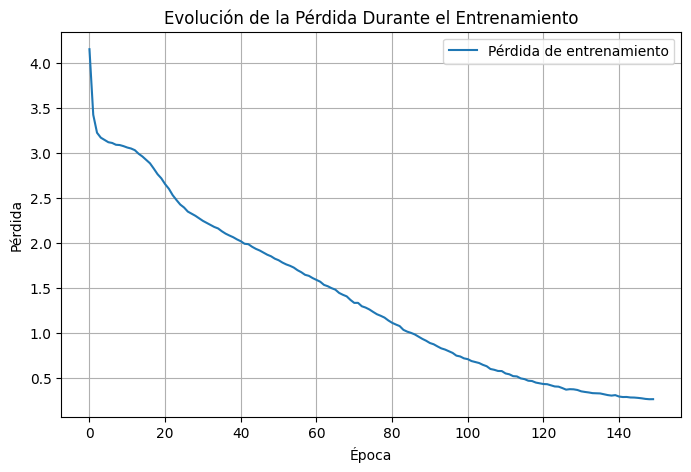

In [25]:
# Visualizar la pérdida durante el entrenamiento
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.title('Evolución de la Pérdida Durante el Entrenamiento')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar
plot_loss(history)


### **Guardado del Modelo Entrenado**

Se guarda el modelo completo, incluyendo arquitectura, pesos y configuración de entrenamiento, en el archivo `model_abascal_150_2024.keras`. Esto permite reutilizar el modelo para inferencias o continuar el entrenamiento sin necesidad de reentrenarlo.

In [26]:
# Guardar el modelo entrenado en un archivo con formato .keras
# Incluye arquitectura, pesos y configuración de entrenamiento
model.save("model_abascal_150_2024.keras")

### **Carga del Modelo Guardado**

En esta celda, se carga un modelo previamente guardado en un archivo `.keras` utilizando la función `load_model` de Keras. Esto permite reutilizar el modelo para inferencias o continuar el entrenamiento.

#### **Detalles**
1. **`load_model`**:
   - Carga el modelo, incluyendo su arquitectura, pesos y configuración original.

2. **Custom Objects**:
   - En este caso, se incluye `sparse_categorical_crossentropy` como la función de pérdida utilizada originalmente en el modelo.

Este paso permite reanudar el uso de un modelo guardado de forma consistente con su configuración inicial.

In [27]:
# Importar la función para cargar modelos guardados y el módulo de pérdidas
from keras.models import load_model
from keras import losses  # Importar el módulo de pérdidas

# Cargar el modelo guardado y asociar la función de pérdida original
loaded_model = load_model(
    "model_abascal_150_2024.keras",  # Ruta del archivo guardado
    custom_objects={'loss': losses.sparse_categorical_crossentropy}  # Función de pérdida usada originalmente
)

### **Preparación del Modelo para Generar Texto**

En esta celda, se reconstruye el modelo con un batch size de 1 para la generación de texto. Esto se debe a que durante la inferencia no es necesario procesar múltiples lotes, lo que simplifica el manejo del modelo.

#### **Pasos Realizados**
1. **Reconstrucción del Modelo**:
   - Se utiliza la misma arquitectura del modelo original (`build_model`) pero con `batch_size=1` para adaptarlo a la inferencia.

2. **Definición de la Forma de Entrada**:
   - Se especifica una forma de entrada flexible con `input_shape=(1, None)`, permitiendo secuencias de cualquier longitud.

3. **Carga de Pesos**:
   - Se cargan los pesos entrenados desde el archivo del modelo guardado (`model_abascal_150_2024.keras`) para asegurar que el modelo conserva su conocimiento previo.

Este paso configura el modelo para generar texto utilizando los pesos entrenados y con un formato adecuado para la inferencia.


In [28]:
# Reconstruir el modelo para la generación de texto
# Cambiamos batch_size a 1 porque en la inferencia no procesamos múltiples lotes
model = build_model(len(vocab), embedding_dim, rnn_units, batch_size=1)

# Construir el modelo con una forma de entrada flexible para inferencia
input_shape = (1, None)  # Lote de tamaño 1 con secuencias de longitud variable
model.build(input_shape=input_shape)  # Crear las variables necesarias para las capas

# Cargar los pesos entrenados en el modelo reconstruido
model.load_weights("model_abascal_150_2024.keras")  # Cargar pesos desde el archivo guardado

### **Función para Generar Texto**

Esta función permite generar texto utilizando el modelo entrenado, partiendo de una cadena inicial (`start_string`). El texto se genera carácter por carácter, utilizando las predicciones del modelo y ajustando su creatividad mediante un parámetro de temperatura.

#### **Detalles de la Función**
1. **Parámetros**:
   - `model`: Modelo entrenado utilizado para la generación.
   - `start_string`: Cadena inicial a partir de la cual se generará el texto.

2. **Variables Internas**:
   - `num_generate`: Número de caracteres a generar.
   - `temperature`: Controla la aleatoriedad de las predicciones. Valores bajos favorecen la coherencia, mientras que valores altos aumentan la diversidad.

3. **Proceso de Generación**:
   - Convierte la cadena inicial a índices numéricos (`char2idx`).
   - Utiliza un bucle para predecir el siguiente carácter basándose en el estado actual del modelo.
   - Las predicciones se ajustan según la temperatura, y se elige un índice aleatoriamente de la distribución ajustada.
   - Convierte el índice predicho de nuevo a un carácter (`idx2char`) y lo añade al texto generado.

4. **Resultado**:
   - Devuelve el texto completo generado, incluyendo la cadena inicial y los caracteres generados.

In [29]:
# Definir una función para generar texto a partir de un modelo entrenado
def generate_text(model, start_string):
    # Número de caracteres a generar
    num_generate = 1000

    # Convertir la cadena inicial a índices numéricos usando char2idx
    input_eval = [char2idx[s] for s in start_string]
    # Añadir una dimensión extra para representar un batch de tamaño 1
    input_eval = tf.expand_dims(input_eval, 0)

    # Lista para almacenar los caracteres generados
    text_generated = []

    # Temperatura para ajustar la creatividad de las predicciones
    temperature = 0.7

    # Generar caracteres uno a uno
    for i in range(num_generate):
        # Obtener las predicciones del modelo
        predictions = model(input_eval)
        # Quitar la dimensión extra
        predictions = tf.squeeze(predictions, 0)
        # Ajustar las predicciones según la temperatura
        predictions = predictions / temperature
        # Elegir el índice del carácter basado en la distribución ajustada
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        # Usar el carácter predicho como entrada para la siguiente predicción
        input_eval = tf.expand_dims([predicted_id], 0)
        # Convertir el índice a carácter y añadirlo al texto generado
        text_generated.append(idx2char[predicted_id])

    # Devolver el texto inicial junto con los caracteres generados
    return start_string + ''.join(text_generated)


### **Evaluación del Texto Generado**

En esta celda se implementan funciones para evaluar la calidad del texto generado por el modelo mediante diversas métricas. Estas evaluaciones permiten cuantificar la coherencia, diversidad y similitud del texto generado con respecto a un texto de referencia.

#### **Funciones Implementadas**
1. **`distinct_ngrams(text, n=2)`**:
   - Calcula el `Distinct-n`, una métrica que mide la diversidad del texto generado analizando los n-gramas únicos en relación con el total de n-gramas.

2. **`calculate_perplexity(model, text)`**:
   - Calcula la perplejidad del texto generado. La perplejidad evalúa qué tan bien el modelo predice la siguiente palabra en una secuencia. Valores más bajos indican mejor desempeño.

3. **`evaluate_text(model, start_string, reference_file_path, n=2)`**:
   - Genera texto a partir de un modelo entrenado y evalúa su calidad utilizando las métricas `Distinct-n`, `Perplejidad` y `BLEU`.

#### **Métricas de Evaluación**
- **Distinct-n**: Diversidad en los n-gramas generados.
- **Perplejidad**: Capacidad del modelo para predecir correctamente las siguientes palabras.
- **BLEU Score**: Similaridad entre el texto generado y el texto de referencia.

#### **Ejemplo de Uso**
- Ruta de referencia: Archivo de texto utilizado como base para la evaluación.
- Cadena inicial: Texto inicial para la generación.

El resultado incluye las métricas y el texto generado, lo que permite un análisis completo de la calidad del modelo.


In [30]:
# Importar las librerías necesarias para las evaluaciones
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction

# Función para calcular Distinct-n (diversidad en los n-gramas)
def distinct_ngrams(text, n=2):
    tokens = text.split()  # Dividir el texto en palabras
    ngrams = list(zip(*[tokens[i:] for i in range(n)]))  # Crear n-gramas
    return len(set(ngrams)) / len(ngrams)  # Relación de n-gramas únicos al total

# Función para calcular la perplejidad del modelo
def calculate_perplexity(model, text):
    # Convertir el texto en índices numéricos
    input_eval = [char2idx[c] for c in text if c in char2idx]  # Filtrar caracteres no válidos
    input_eval = tf.expand_dims(input_eval, 0)  # Añadir dimensión de batch

    # Generar predicciones del modelo
    predictions = model(input_eval)

    # Ajustar las dimensiones para la pérdida
    predictions = tf.squeeze(predictions, 0)  # Quitar dimensión de batch
    labels = input_eval[0, 1:]  # Crear etiquetas desplazadas
    predictions = predictions[:len(labels)]  # Asegurar longitud igual entre predicciones y etiquetas

    # Calcular la pérdida de entropía cruzada y convertirla en perplejidad
    loss = tf.keras.losses.sparse_categorical_crossentropy(labels, predictions, from_logits=True)
    perplexity = tf.exp(tf.reduce_mean(loss)).numpy()  # Convertir pérdida promedio a perplejidad
    return perplexity

# Función principal para evaluar texto generado
def evaluate_text(model, start_string, reference_file_path, n=2):
    from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

    # Leer el texto de referencia
    with open(reference_file_path, "r", encoding="utf-8") as file:
        reference_text = file.read()

    # Dividir el texto de referencia en líneas para generar múltiples listas
    list_of_references = [line.split() for line in reference_text.splitlines() if line.strip()]

    # Agrupar todas las referencias en un único conjunto
    list_of_references = [list_of_references]

    # Generar texto con el modelo
    generated_text = generate_text(model, start_string)
    hypotheses = [generated_text.split()]  # Convertir el texto generado en tokens

    # Calcular Distinct-n
    distinct_score = distinct_ngrams(generated_text, n)

    # Calcular la perplejidad
    perplexity = calculate_perplexity(model, generated_text)

    # Calcular el BLEU Score con suavizado robusto
    smooth = SmoothingFunction().method4  # Suavizado robusto
    bleu_score = corpus_bleu(list_of_references, hypotheses, smoothing_function=smooth)

    # Devolver las métricas y el texto generado
    return {
        "Generated Text": generated_text,
        "Distinct Score": distinct_score,
        "Perplexity": perplexity,
        "BLEU Score": bleu_score
    }

# Ejemplo de uso: Evaluar el texto generado
reference_file_path = "/content/intervencionesAbascal.txt"  # Ruta del archivo de referencia
start_string = "España es "  # Texto inicial para la generación

# Evaluar el texto generado y obtener métricas
results = evaluate_text(model, start_string, reference_file_path, n=2)

# Mostrar los resultados
print("Texto Generado:\n", results["Generated Text"])
print("\nMétricas de Evaluación:")
print(f"Distinct Score: {results['Distinct Score']:.4f}")
print(f"Perplejidad: {results['Perplexity']:.4f}")
print(f"BLEU Score: {results['BLEU Score']:.4f}")

Texto Generado:
 España es España y a la vez impidiendo su detención, por instrucciones expresas del Gabernos en El fayor de esta Cámara. Estedes tiene nos importa el poder socialista; usted es más de Largo Caballero y de Negrín. Por cierto, aquí no se ha contertido na patecal y la muyo, que no pueden pagar la factura de la luz, que no pueden encender la calefacción, que no pueden llega Cabalgando sobre la mentira —y no me cansaré de repetirlo en esta tribuna— crece la miseria, igual que su ideología.
Muchas gracias.
Concluyo inmediatamente. VOX ha nacido en el año 2014, VOX presidente del Gobierno: estudiarla resulta vital para entendernos unos y otros y para desarrollar un por tane las impuestos excuando el porívo industrial. Ahí afuera hay millones de españoles que sufren la ruina y la calle, que no están en los mercados, en los bares. Porque su Gobierno, señor Sánchez, es una fábrica de miseria, igual que su ideología.
Muchas gracias.
Concluyo inmediatamente, presidenta. Vimos ayer